In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

dataset\test\apple\Image_1.jpg
dataset\test\apple\Image_10.jpg
dataset\test\apple\Image_2.jpg
dataset\test\apple\Image_3.jpg
dataset\test\apple\Image_4.jpg
dataset\test\apple\Image_5.jpg
dataset\test\apple\Image_6.JPG
dataset\test\apple\Image_7.jpg
dataset\test\apple\Image_8.jpg
dataset\test\apple\Image_9.jpg
dataset\test\banana\Image_1.jpg
dataset\test\banana\Image_10.jpg
dataset\test\banana\Image_2.jpg
dataset\test\banana\Image_3.jpg
dataset\test\banana\Image_4.jpg
dataset\test\banana\Image_5.jpg
dataset\test\banana\Image_6.jpg
dataset\test\banana\Image_8.jpg
dataset\test\banana\Image_9.jpg
dataset\test\beetroot\Image_1.jpg
dataset\test\beetroot\Image_10.jpg
dataset\test\beetroot\Image_2.jpg
dataset\test\beetroot\Image_3.jpg
dataset\test\beetroot\Image_4.jpg
dataset\test\beetroot\Image_5.jpg
dataset\test\beetroot\Image_6.jpg
dataset\test\beetroot\Image_7.jpg
dataset\test\beetroot\Image_8.jpg
dataset\test\beetroot\Image_9.jpg
dataset\test\bell pepper\Image_1.jpg
dataset\test\bell pepp

In [2]:
train_dir = "dataset/train"
valid_dir = "dataset/validation"
test_dir = "dataset/test"
num_classes = 36

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

validation_generator = validation_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

Found 3115 images belonging to 36 classes.
Found 359 images belonging to 36 classes.
Found 351 images belonging to 36 classes.


In [5]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [6]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [7]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Epoch 1/10
 1/97 [..............................] - ETA: 9:50 - loss: 3.7993 - accuracy: 0.0000e+00

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


97/97 [==============================] - 214s 2s/step - loss: 1.2578 - accuracy: 0.6435 - val_loss: 0.4052 - val_accuracy: 0.8813
Epoch 2/10
97/97 [==============================] - 180s 2s/step - loss: 0.5160 - accuracy: 0.8307 - val_loss: 0.2996 - val_accuracy: 0.9062
Epoch 3/10
97/97 [==============================] - 180s 2s/step - loss: 0.3430 - accuracy: 0.8777 - val_loss: 0.2280 - val_accuracy: 0.9375
Epoch 4/10
97/97 [==============================] - 180s 2s/step - loss: 0.2491 - accuracy: 0.9131 - val_loss: 0.2060 - val_accuracy: 0.9500
Epoch 5/10
97/97 [==============================] - 179s 2s/step - loss: 0.2040 - accuracy: 0.9312 - val_loss: 0.1444 - val_accuracy: 0.9594
Epoch 6/10
97/97 [==============================] - 180s 2s/step - loss: 0.1635 - accuracy: 0.9406 - val_loss: 0.1854 - val_accuracy: 0.9531
Epoch 7/10
97/97 [==============================] - 178s 2s/step - loss: 0.1258 - accuracy: 0.9582 - val_loss: 0.1738 - val_accuracy: 0.9625
Epoch 8/10
97/97 [======

In [9]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.257806,0.643529,0.405173,0.881250
1,0.516001,0.830684,0.299559,0.906250
2,0.343049,0.877716,0.227999,0.937500
3,0.249139,0.913072,0.205986,0.950000
4,0.203968,0.931236,0.144376,0.959375


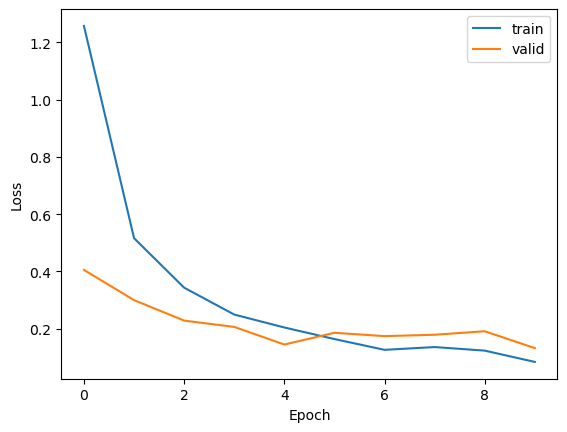

In [10]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "valid"])
plt.show()

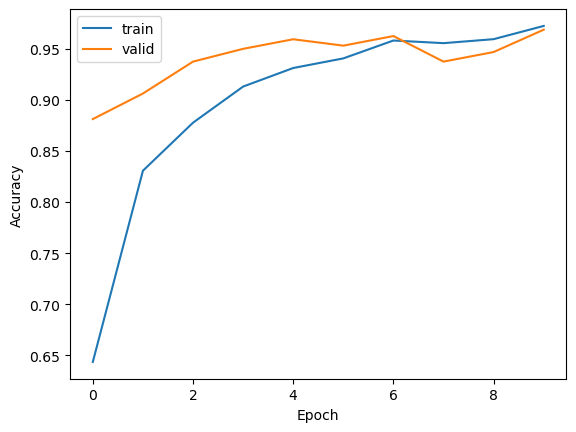

In [11]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "valid"])
plt.show()

In [12]:
preds = model.predict(test_generator)

12/12 [==============================] - 23s 2s/step


In [13]:
y_pred = np.argmax(preds, axis=1)

In [14]:
for k, v in test_generator.class_indices.items():
    print(v, ":", k)

0 : apple
1 : banana
2 : beetroot
3 : bell pepper
4 : cabbage
5 : capsicum
6 : carrot
7 : cauliflower
8 : chilli pepper
9 : corn
10 : cucumber
11 : eggplant
12 : garlic
13 : ginger
14 : grapes
15 : jalepeno
16 : kiwi
17 : lemon
18 : lettuce
19 : mango
20 : onion
21 : orange
22 : paprika
23 : pear
24 : peas
25 : pineapple
26 : pomegranate
27 : potato
28 : raddish
29 : soy beans
30 : spinach
31 : sweetcorn
32 : sweetpotato
33 : tomato
34 : turnip
35 : watermelon


In [15]:
pred_classes = {
    0 : "apple",
    1 : "banana",
    2 : "beetroot",
    3 : "bell pepper",
    4 : "cabbage",
    5 : "capsicum",
    6 : "carrot",
    7 : "cauliflower",
    8 : "chilli pepper",
    9 : "corn",
    10 : "cucumber",
    11 : "eggplant",
    12 : "garlic",
    13 : "ginger",
    14 : "grapes",
    15 : "jalepeno",
    16 : "kiwi",
    17 : "lemon",
    18 : "lettuce",
    19 : "mango",
    20 : "onion",
    21 : "orange",
    22 : "paprika",
    23 : "pear",
    24 : "peas",
    25 : "pineapple",
    26 : "pomegranate",
    27 : "potato",
    28 : "raddish",
    29 : "soy beans",
    30 : "spinach",
    31 : "sweetcorn",
    32 : "sweetpotato",
    33 : "tomato",
    34 : "turnip",
    35 : "watermelon"
}

In [16]:
y_pred = list(map(lambda x: pred_classes[x], y_pred))

In [17]:
y_test = list(map(lambda x: pred_classes[x], test_generator.classes))

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

               precision    recall  f1-score   support

        apple       0.80      1.00      0.89         8
       banana       0.78      1.00      0.88         7
     beetroot       1.00      1.00      1.00        10
  bell pepper       0.90      0.90      0.90        10
      cabbage       1.00      1.00      1.00        10
     capsicum       0.90      0.75      0.82        12
       carrot       0.90      1.00      0.95         9
  cauliflower       1.00      1.00      1.00        10
chilli pepper       1.00      0.83      0.91        12
         corn       0.80      0.89      0.84         9
     cucumber       1.00      1.00      1.00        10
     eggplant       1.00      1.00      1.00        10
       garlic       1.00      1.00      1.00        10
       ginger       1.00      1.00      1.00        10
       grapes       1.00      1.00      1.00        10
     jalepeno       1.00      0.83      0.91        12
         kiwi       1.00      1.00      1.00        10
        l